# Project : Predict the Price of Airbnb rooms 

#### Objective: Predict the price of rooms to be advertised on the Airbnb site. The prediction is based on different attributes like neighborhood, number of rooms, number of reviews, availibility of the rooms. The dataset is obtained from historic Airbnb data obtained from Airbnb site.

## Analyze the data

### Step 1: Read CSV file with Airbnb data downloaded from http://insideairbnb.com/get-the-data.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
df = pd.read_csv('/Users/doyelm/Documents/Project/listings.csv')



Populating the interactive namespace from numpy and matplotlib


### Step2: Study the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 16 columns):
id                                9663 non-null int64
name                              9663 non-null object
host_id                           9663 non-null int64
host_name                         9661 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     9663 non-null int64
latitude                          9663 non-null float64
longitude                         9663 non-null float64
room_type                         9663 non-null object
price                             9663 non-null int64
minimum_nights                    9663 non-null int64
number_of_reviews                 9663 non-null int64
last_review                       6006 non-null object
reviews_per_month                 6007 non-null float64
calculated_host_listings_count    9663 non-null int64
availability_365                  9663 non-null int64
dtypes: float64(4), 

In [115]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.663000e+03,9.663000e+03,0.0,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,9663.000000,6007.000000,9663.000000,9663.000000
mean,9.655724e+06,2.907623e+07,NaN,78722.467764,30.276059,-97.751336,292.788471,2.419021,13.917313,1.359161,3.673704,167.370071
std,5.702724e+06,3.111086e+07,NaN,20.714283,0.054293,0.052304,443.171455,5.808939,33.274246,1.675813,9.636083,148.704061
min,1.078000e+03,2.300000e+01,NaN,78701.000000,30.114882,-98.053553,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,4.849021e+06,4.689866e+06,NaN,78704.000000,30.244039,-97.769482,89.000000,1.000000,0.000000,0.240000,1.000000,9.000000
50%,1.036768e+07,1.738394e+07,NaN,78721.000000,30.266359,-97.744387,160.000000,2.000000,2.000000,0.740000,1.000000,133.000000
75%,1.518828e+07,4.427075e+07,NaN,78745.000000,30.298177,-97.722401,340.000000,2.000000,12.000000,1.830000,2.000000,339.000000
max,1.759094e+07,1.195162e+08,NaN,78759.000000,30.506688,-97.560622,10000.000000,250.000000,427.000000,12.000000,73.000000,365.000000


In [116]:
pd.DataFrame(df['price'].describe())

,price
count,9663.000000
mean,292.788471
std,443.171455
min,0.000000
25%,89.000000
50%,160.000000
75%,340.000000
max,10000.000000


### Plot histogram to determine price range

Text(0.5,0,'price')

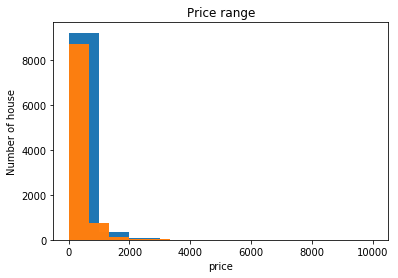

In [3]:
ax = df['price'].hist()

ax.set_title('Price range')

df['price'].plot.hist(alpha=0.99, bins=15)

ax.set_ylabel('Number of house')
ax.set_xlabel('price')


### Plot histogram to determine price range - on a logarithmic scale

Text(0.5,1,'Price range on logarithmic scale')

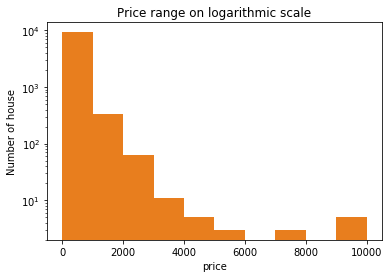

In [118]:
ax = df['price'].hist()

ax.set_title('Price range')


df['price'].plot.hist(alpha=0.9)

ax.set_ylabel('Number of house')
ax.set_yscale('log')
ax.set_xlabel('price')

plt.title('Price range on logarithmic scale')

### Plot Bar Plot to determine price variation with neighborhood

Text(0.5,0.98,'')

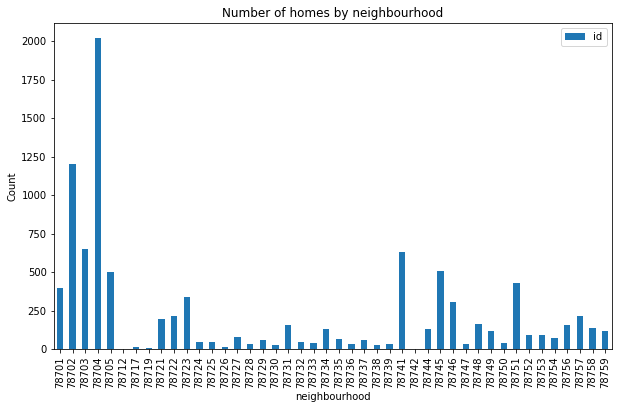

In [5]:
df.groupby(['neighbourhood' ])[['id']].count().plot(kind='bar').set_ylabel('Count')

plt.title('Number of homes by neighbourhood')
plt.figure(figsize=(3,4))
plt.suptitle("")


### Plot whisker plot to determine outliers

Find outliers for each room type
Populating the interactive namespace from numpy and matplotlib


Text(0.5,0.98,'')

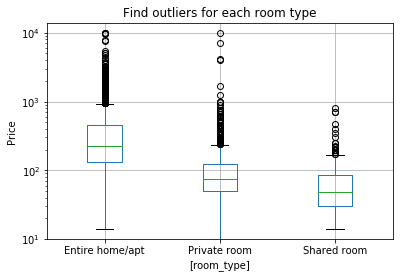

In [6]:
print('Find outliers for each room type')
import pandas as pd
%pylab inline
df = pd.read_csv('/Users/doyelm/Documents/Project/listings.csv')

bp = df.boxplot(column=['price'], by=['room_type'])
bp.set_ylabel('Price')
bp.set_yscale('log')
plt.title('Find outliers for each room type')
plt.suptitle("")

### Boxplot without outliers

Remove outliers for each room type
Populating the interactive namespace from numpy and matplotlib


Text(0.5,0.98,'')

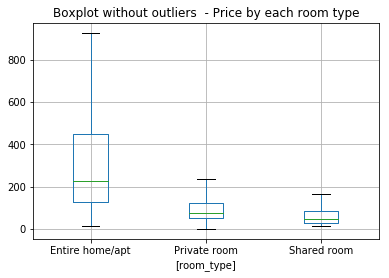

In [7]:
print('Remove outliers for each room type')
import pandas as pd
df = pd.read_csv('/Users/doyelm/Documents/Project/listings.csv')
%pylab inline


df.boxplot(column=['price'], by=['room_type'],showfliers=False)
plt.title('Boxplot without outliers  - Price by each room type')
plt.suptitle("")

### Plot count of each type of room 

Text(0.5,1,'Room Type - Count')

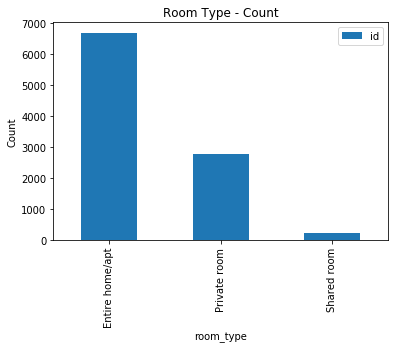

In [122]:
df.groupby(['room_type' ])[['id']].count().plot(kind='bar').set_ylabel('Count')
plt.title('Room Type - Count')

### Check number of last reviews by years to check if most of the data is current

DatetimeIndex(['2016-05-13', '2013-03-12', '2016-12-20', '2016-06-12',
               '2017-02-20', '2017-03-06', '2017-03-03', '2017-01-04',
               '2017-03-05', '2016-10-21',
               ...
               '2017-02-19', '2016-11-11', '2016-12-01', '2017-02-22',
               '2017-02-17', '2015-10-28', '2017-02-16', '2017-02-23',
               '2017-01-15', '2017-02-25'],
              dtype='datetime64[ns]', name='last_review', length=6006, freq=None)


Text(0.5,1,'Number of last reviews by year')

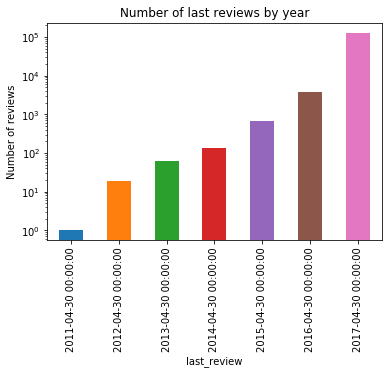

In [123]:
from datetime import datetime

df = df[df.last_review.notnull()]
dates = pd.to_datetime(df.last_review, format='%Y-%m-%d')
#print(dates)
#df = dates.groupby([pd.TimeGrouper('12M')]) 
df.set_index(dates,inplace=True)
print(df.index)
df['number_of_reviews'].resample('6M').sum().plot(kind='bar').set_ylabel('Number of reviews')
df['number_of_reviews'].resample('12M').sum().plot(kind='bar').set_ylabel('Number of reviews')
plt.yscale('log')
plt.title('Number of last reviews by year')

### Check location of the homes to check if they are from the same area

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


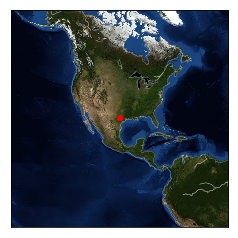

In [7]:
from mpl_toolkits.basemap import Basemap
#df.plot.scatter('latitude','longitude')
#plt.title('Number of homes by latitude longitude')
m = Basemap(projection='aeqd',
              lon_0 = -98,
              lat_0 = 30,
              width = 10000000,
              height = 10000000)
lats = df.latitude
lons = df.longitude
x, y = m(lons.values, lats.values)  # transform coordinates
m.bluemarble(scale=0.9)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines
plt.scatter(x, y, 10, marker='o', color='Red') 

plt.show()

## Clean the data

### Find how many neighbourgoods have sample > 10

In [8]:
df2 = df.groupby(['neighbourhood'])[['id']].count().reset_index()
 
len(df2[df2.id > 10].sort_values('id',ascending=False ) )

41

### Select top 39 neighbourhoods - from above result we see 39 neighbourhoods have sample > 10

In [9]:

df_1=df.groupby(['neighbourhood' ])[['id']].count().sort_values(by=['id'], ascending=False)[0:39]

# choose data for the neighbourhoods in the list created above
df_new = df[df['neighbourhood'].isin(df_1.index.values.tolist())].loc[:, ('neighbourhood', 'latitude','longitude','room_type','price','minimum_nights','number_of_reviews', 'availability_365') ]
df_new.fillna(0)   
df_new.price=df_new.price.astype(float) 
df_new.minimum_nights=df_new.minimum_nights.astype(float) 
df_new.number_of_reviews=df_new.number_of_reviews.astype(float) 
df_new.availability_365=df_new.availability_365.astype(float) 
df_new.neighbourhood=df_new.neighbourhood.astype(str) 
 
df_new.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9621 entries, 0 to 9662
Data columns (total 8 columns):
neighbourhood        9621 non-null object
latitude             9621 non-null float64
longitude            9621 non-null float64
room_type            9621 non-null object
price                9621 non-null float64
minimum_nights       9621 non-null float64
number_of_reviews    9621 non-null float64
availability_365     9621 non-null float64
dtypes: float64(6), object(2)
memory usage: 676.5+ KB


### Check if data exists with price == 0

In [127]:
df[df.price == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
last_review,,,,,,,,,,,,,,,,


### convert non-numeric binary variables into binary (0/1) variables. Converts categorical variables into dummy variables.

In [10]:

def preprocess_features(X):
    '''   converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)
    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        #print(col,col_data)
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

y =  log( df_new.price+1)#.fillna(0)   

X = df_new.loc[:,df_new.columns != 'price'] 
X_all = preprocess_features(X)
 
 

 

## Apply Models

### Split the targets into training/testing sets

In [11]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

### perform T test 

In [12]:
from scipy import stats
 
df_2=df.groupby(['room_type' ])[['id']].count().sort_values(by=['id'] , ascending=False)[0:1]
df_3=df.groupby(['room_type'])[['id']].count().sort_values(by=['id'] , ascending=False)[1:2]
#print(df_2)
#print(df_3)
df_array2=df[df['room_type'].isin(df_2.index.values.tolist())].price
df_array3=df[df['room_type'].isin(df_3.index.values.tolist())].price

#print(df_array1)
np.seterr(divide='ignore', invalid='ignore')
stats.ttest_ind(df_array2, df_array3, equal_var = False)

Ttest_indResult(statistic=32.789444173586759, pvalue=3.1813582468139752e-222)

#### In the above test stats.ttest_ind is used to calculate the T-test for the means of two independent samples of scores. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages. 
#### Null hypothesis : "The average price for the apartment is similar to the average price for the private room" 
#### The alternatve hypothesis : " the average price is differant between the types of rooms. 
###  As P-value is larger than 0.05 or 0.1, we cannot reject the null hypothesis 



### OLS - Ordinary Least squares model

In [13]:

import statsmodels
from numpy.random import randn
import statsmodels.api as sm

%pylab inline

mymodel = sm.OLS(y,X_all)
results = mymodel.fit()
results.params
results.summary()
results.summary2()
results_summary=results.summary2()
print(results_summary)



Populating the interactive namespace from numpy and matplotlib
                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.414     
Dependent Variable:      price                AIC:                    21238.3918
Date:                    2018-05-06 19:09     BIC:                    21568.2901
No. Observations:        9621                 Log-Likelihood:         -10573.   
Df Model:                45                   F-statistic:            152.0     
Df Residuals:            9575                 Prob (F-statistic):     0.00      
R-squared:               0.417                Scale:                  0.52986   
--------------------------------------------------------------------------------
                            Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------------------
neighbourhood_78701        -22.6742   4.0248  -5.6337 0.0000  -30.5636 

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### The OLS class estimates a multi-variate regression model and provides a variety of fit-statistics. pvalue should be less than 0.05 . 5 values with Pvalue > 0.05 -> can be ignored


### linear regression - mean squared deviation - for neighbourhood and price

In [14]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create linear regression object
regr = linear_model.LinearRegression()


# Train the model using the training sets
regr.fit(df_X_train,df_y_train)

# Make predictions using the testing set
df_y_pred = regr.predict(df_X_test)


from sklearn.metrics import r2_score

print(' R-squared:',r2_score(df_y_test, df_y_pred)) 



 R-squared: 0.431268492801


### decision tree

In [33]:
print(__doc__)


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth=6)


# Train the model using the training sets
clf.fit(df_X_train,df_y_train)

# Make predictions using the testing set
df_y_pred_test = clf.predict(df_X_test)


from sklearn.metrics import r2_score

print('R-squared for the training',r2_score(df_y_train, df_y_pred_train))
print('R-squared for the testing',r2_score(df_y_test, df_y_pred_test))



Automatically created module for IPython interactive environment
R-squared for the training 0.308431378639
R-squared for the testing 0.460116654917


### Random Forest 

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=8, random_state=0)
regr.fit(df_X_train, df_y_train)
# Make predictions using the testing set
df_y_pred_train = regr.predict(df_X_train)

df_y_pred_test = regr.predict(df_X_test)

print('R-squared for the training',r2_score(df_y_train, df_y_pred_train))  #R^2 (coefficient of determination) regression score function.
print('R-squared for the testing',r2_score(df_y_test, df_y_pred_test))  #R^2 (coefficient of determination) regression score function.


R-squared for the training 0.60159974014
R-squared for the testing 0.523094430488


### Apply Random forest over various sample sizes

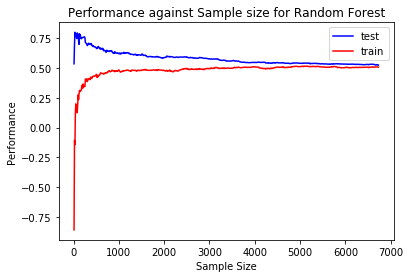

In [53]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=6, random_state=0)

sample=[]
list1=[]
list2=[]

l=len(df_X_train)
for i in range(10,len(df_X_train),10):
    df_X1_train=df_X_train[0:i]  
    df_y1_train=df_y_train[0:i] 
    # Train the model using the training sets
    regr.fit(df_X1_train, df_y1_train)
    # Make predictions using the testing set
    df_y1_pred_train = regr.predict(df_X1_train)
    R2train=r2_score(df_y1_train, df_y1_pred_train)
    #print('R^2 for the training',r2_score(df_y1_train, df_y1_pred_train))
    list1.append(R2train)
    df_y_pred_test = regr.predict(df_X_test)
    sample.append(i)
    #print('R^2 for the testing',r2_score(df_y_test, df_y_pred_test))
    R2test=r2_score(df_y_test, df_y_pred_test)
    list2.append(R2test)

plt.ylabel('Performance')
plt.xlabel('Sample Size')
 
plt.plot(sample,list1, '-b', label='test')
plt.plot(sample,list2, '-r', label='train')
plt.title('Performance against Sample size for Random Forest')
plt.legend()

### Taking 7000 samples - the best value from the above graph

In [60]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=8, random_state=0)

df_X1_train=df_X_train[0:7000]  
df_y1_train=df_y_train[0:7000] 
#print(df_X1_train,df_y1_train) 
# Train the model using the training sets
regr.fit(df_X1_train, df_y1_train)
# Make predictions using the testing set
df_y1_pred_train = regr.predict(df_X1_train)
R2train=r2_score(df_y1_train, df_y1_pred_train)
print('R^2 for the training',r2_score(df_y1_train, df_y1_pred_train))

df_y_pred_test = regr.predict(df_X_test)
print('R^2 for the testing',r2_score(df_y_test, df_y_pred_test))


R^2 for the training 0.60159974014
R^2 for the testing 0.523094430488


### Applying gridSearch to the best value sample  

In [61]:
#Applying gridSearch to the best value sample # taking quite some time
from sklearn.grid_search import GridSearchCV
 
regr = RandomForestRegressor(max_depth=8, random_state=0) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}
 
CV_regr = GridSearchCV(estimator=regr, param_grid=param_grid, cv= 10)
CV_regr.fit(df_X1_train, df_y1_train)
print('Best params',CV_regr.best_params_)



Best params {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 54}


### Nearest neighbours

In [57]:

 
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
 

clf = neighbors.KNeighborsRegressor(n_neighbors=20)

# Train the model using the training sets
clf.fit(df_X_train, df_y_train)

# Make predictions using the testing set
df_y_pred_train = clf.predict(df_X_train)

df_y_pred_test = clf.predict(df_X_test)

print('R Squared for the training',r2_score(df_y_train, df_y_pred_train))  #R^2 (coefficient of determination) regression score function.
print('R Squared for the testing',r2_score(df_y_test, df_y_pred_test))  #R^2 (coefficient of determination) regression score function.
print(X_all.shape)

R^2 for the training 0.343041163485
R^2 for the testing 0.287156831602
(9621, 47)


### Apply Nearest neighbours over various sample sizes

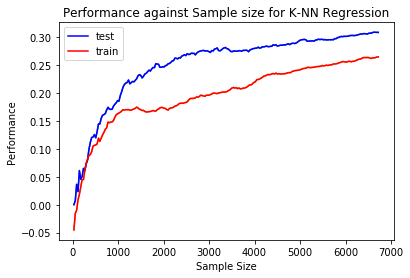

In [59]:
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
 
regr = neighbors.KNeighborsRegressor(n_neighbors=30)

sample=[]
list1=[]
list2=[]

l=len(df_X_train)
for i in range(30,len(df_X_train),30):
    df_X1_train=df_X_train[0:i]  
    df_y1_train=df_y_train[0:i] 
    # Train the model using the training sets
    regr.fit(df_X1_train, df_y1_train)
    # Make predictions using the testing set
    df_y1_pred_train = regr.predict(df_X1_train)
    R2train=r2_score(df_y1_train, df_y1_pred_train)
    list1.append(R2train)
    df_y_pred_test = regr.predict(df_X_test)
    sample.append(i)
    R2test=r2_score(df_y_test, df_y_pred_test)
    list2.append(R2test)

plt.plot(sample,list1,sample,list2)
plt.ylabel('Performance')
plt.xlabel('Sample Size')
#plt.plot(sample,list1,sample,list2)
plt.plot(sample,list1, '-b', label='test')
plt.plot(sample,list2, '-r', label='train')
plt.title('Performance against Sample size for K-NN Regression')
plt.legend()

### Conclusion : From the above plots and R2 values we see Random Forest is the best model in this case to predict the price of Airbnb rooms from the datasert we used.